<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/Branch_kaggle-project/DLbasicOptimKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle *Spaceship Titanic*

https://www.kaggle.com/competitions/spaceship-titanic/data

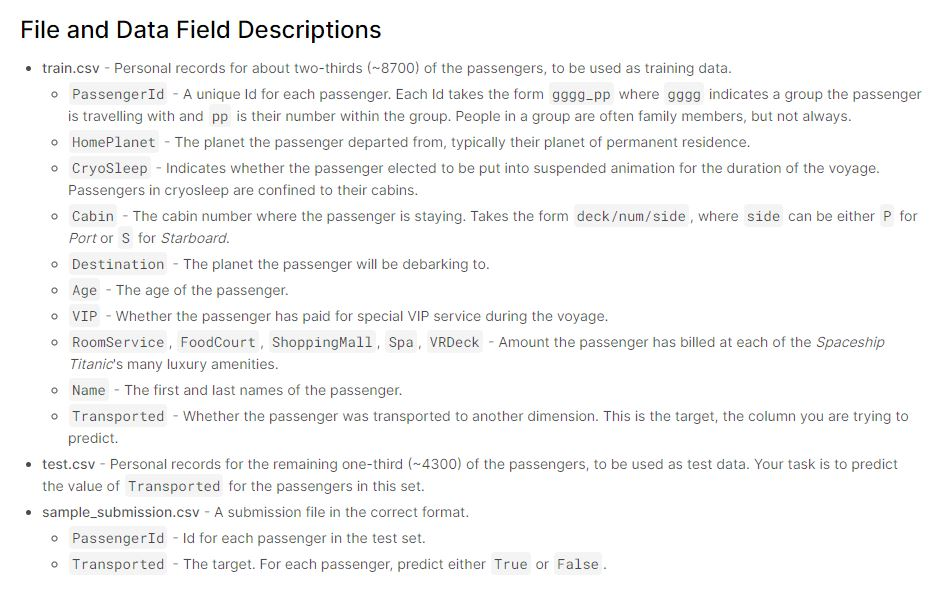

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

In [ ]:
%cd drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
#import functions
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score

from joblib import dump, load

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.neighbors import KNeighborsifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridgeifier

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
import random

ImportError: ignored

Importation des données

In [ ]:
df_train = pad.read_csv('train.csv')
df_test = pad.read_csv('test.csv')

### Préparation des données du fichier test

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0
...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,NaN,NaN,NaN,1018.0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,P,D,296.0,0.0
4275,9273_01,Europa,False,NaN,NaN,False,P,D,297.0,3203.0


In [ ]:
df_test_mod = df_test_mod.dropna()

Préparation des données quantitatives (standardisation) et catégorielles (encodage)

In [ ]:
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_test_mod[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])

NameError: ignored

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

NameError: ignored

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_test_mod[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_test_mod[features_Quant].columns, data = df_features_Quant).set_index(df_test_mod.index)

NameError: ignored

In [ ]:
df_test_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])).set_index(df_test_mod.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Chargement du modèle optimisé
model__KN = load('KNeighborsifier_model.joblib')

In [ ]:
df_test_mod["Prediction_Transported"] = model__KN.predict(df_test_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Prediction_Transported
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0,True
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0,False
2,0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0,True
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0,True
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4269,9263_01,Earth,True,TRAPPIST-1e,43.0,False,S,G,1495.0,0.0,True
4270,9265_01,Mars,False,TRAPPIST-1e,43.0,False,S,D,278.0,3898.0,False
4271,9266_01,Earth,False,TRAPPIST-1e,40.0,False,S,F,1796.0,868.0,False
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496.0,0.0,True


In [ ]:
df_test_mod.set_index('PassengerId')

,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Prediction_Transported
PassengerId,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0,True
0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0,False
0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0,True
0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0,True
0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0,False
...,...,...,...,...,...,...,...,...,...,...
9263_01,Earth,True,TRAPPIST-1e,43.0,False,S,G,1495.0,0.0,True
9265_01,Mars,False,TRAPPIST-1e,43.0,False,S,D,278.0,3898.0,False
9266_01,Earth,False,TRAPPIST-1e,40.0,False,S,F,1796.0,868.0,False


In [ ]:
df_test_mod = df_test_mod.rename(columns={"Prediction_Transported": "Transported"})

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].to_csv('Projet8_prediction.csv', index = False)

In [ ]:
df_test_mod[['PassengerId' , 'Transported']].head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,False
7,0032_01,True
8,0032_02,True
9,0033_01,False
10,0037_01,False


#IA basique cycy:


In [ ]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

%pip install keras-tuner --upgrade
import keras_tuner as kt

#a regarder:https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

     |████████████████████████████████| 133 kB 7.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd drive/MyDrive/Kaggle



Mounted at /content/drive
/content/drive/MyDrive/Kaggle


In [ ]:
#importation des données
df_X = pad.read_csv('/content/drive/MyDrive/Kaggle/df_train_norm_full.csv')
#X=df_X.drop('Surname_encod',1)#enléve la premiére colone avec les numéros de ligne
X=df_X
df_y = pad.read_csv('/content/drive/MyDrive/Kaggle/data_projet8_TRAIN_clean.csv')
y=df_y["Transported"]
y


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [ ]:
neg, pos = np.bincount(df_y["Transported"])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 8693
    Positive: 4378 (50.36% of total)



In [ ]:
#hot encoder
#tf.keras.preprocessing.text.one_hot (pour du text comme les noms)

def onehot(x):
  if x==0:
    vec=[0,1]
  else :
    vec=[1,0]
  return vec

y= pad.DataFrame(map(onehot, y))
y

,0,1
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
8688,0,1
8689,0,1
8690,1,0
8691,0,1


In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 7)
y_train

,0,1
5854,1,0
1837,1,0
2235,0,1
7353,0,1
5224,0,1
...,...,...
1372,1,0
919,0,1
4307,1,0
5699,1,0


In [ ]:
X


,Age,Cabin_number,Dépense_totale,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,...,x5_F,x5_G,x5_T,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Firstname_encod,Surname_encod
0,0.493671,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.666667
1,0.303797,0.000000,0.020452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.4,0.222222
2,0.734177,0.000000,0.288521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.444444
3,0.417722,0.000000,0.143830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.444444
4,0.202532,0.000528,0.030317,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.051742,0.237197,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,0.777778
8689,0.227848,0.791447,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.4,0.444444
8690,0.329114,0.791975,0.052047,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.4,0.222222
8691,0.405063,0.321014,0.128852,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.6,0.777778


In [ ]:
#entrainement du model

model = keras.Sequential([keras.Input(shape=(30,)),
                          keras.layers.LayerNormalization(),
                          keras.layers.Dense(1140, activation='selu'),
                          keras.layers.Dropout(0.5),
                          #keras.layers.BatchNormalization(), 
                          #keras.layers.Dense(782, activation='relu'),
                          #keras.layers.Dropout(0.1),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(782, activation='relu'),
                          #keras.layers.Dropout(0.1),
                          #keras.layers.BatchNormalization(),
                          #keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')]) #hard_sigmoid #


model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), #Ftrl
              loss='BinaryCrossentropy',
              metrics=['BinaryAccuracy'])#Recall



#######create callback
filepath = '/content/my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=1,
                             patience=5, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]


######train model
#history =model.fit(X_train, y_train, epochs=10)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=int(len(X_train)/10),callbacks=callbacks, verbose=0) #,validation_split=0.2,shuffle=True) #, batch_size=64
#model.fit(x, y, batch_size=32, epochs=10)

model.summary()

#Load best model
model = keras.models.load_model(filepath)
#yhat = model.predict(X_test)
#"print('Model MSE on test data = ', mse(y_test, yhat).numpy())


Epoch 1: loss improved from inf to 0.88944, saving model to /content/my_best_model.hdf5

Epoch 2: loss improved from 0.88944 to 0.64068, saving model to /content/my_best_model.hdf5

Epoch 3: loss improved from 0.64068 to 0.59765, saving model to /content/my_best_model.hdf5

Epoch 4: loss improved from 0.59765 to 0.58844, saving model to /content/my_best_model.hdf5

Epoch 5: loss did not improve from 0.58844

Epoch 6: loss did not improve from 0.58844

Epoch 7: loss did not improve from 0.58844

Epoch 8: loss did not improve from 0.58844

Epoch 9: loss did not improve from 0.58844

Epoch 10: loss improved from 0.58844 to 0.58067, saving model to /content/my_best_model.hdf5

Epoch 11: loss did not improve from 0.58067

Epoch 12: loss did not improve from 0.58067

Epoch 13: loss improved from 0.58067 to 0.55478, saving model to /content/my_best_model.hdf5

Epoch 14: loss improved from 0.55478 to 0.52971, saving model to /content/my_best_model.hdf5

Epoch 15: loss improved from 0.52971 to

In [ ]:
#####optimizer###################
ListOptimizerKeras=[
"SGD",
"RMSprop",
"Adam",
"Adadelta",
"Adagrad",
"Adamax",
"Nadam",
"Ftrl"
]

##############loss attention entre  et function##########
ListLossProbalisticKeras=[
"BinaryCrossentropy" 
#"CategoricalCrossentropy", 
#"SparseCategoricalCrossentropy", 
#"binary_crossentropy",
#"categorical_crossentropy",
#"sparse_categorical_crossentropy",
#"poisson", 
#"kl_divergence" 
]

ListLossRegressionKeras=[                       
"MeanSquaredError", 
"MeanAbsoluteError", 
"MeanAbsolutePercentageError",
"MeanSquaredLogarithmicError", 
"CosineSimilarity", 
"mean_squared_error", 
"mean_absolute_error", 
"mean_absolute_percentage_error", 
"mean_squared_logarithmic_error", 
"cosine_similarity", 
"Huber", 
"log_cosh"
] 

ListLossHingeKeras=[
"Hinge", 
"SquaredHinge",
"CategoricalHinge", 
"hinge function",
"squared_hinge function",
"categorical_hinge function"
]

##########################metric#################
ListAccuracyMetricsKeras=[
#"Accuracy", 
"BinaryAccuracy", 
#"CategoricalAccuracy", 
#"SparseCategoricalAccuracy", 
#"TopKCategoricalAccuracy", 
#"SparseTopKCategoricalAccuracy" 
]


ListProbabilisticMetricsKeras=[
"BinaryCrossentropy", 
"CategoricalCrossentropy", 
"SparseCategoricalCrossentropy", 
"KLDivergence", 
"Poisson"
] 

ListRegressionMetricsKeras=[
"MeanSquaredError", 
"RootMeanSquaredError", 
"MeanAbsoluteError", 
"MeanAbsolutePercentageError", 
"MeanSquaredLogarithmicError", 
"CosineSimilarity", 
"LogCoshError"
] 

ListclassificationMetricsKeras=[
"AUC", 
"Precision", 
"Recall", 
#"TruePositives", 
#"TrueNegatives", 
#"FalsePositives", 
#"FalseNegatives", 
"PrecisionAtRecall", 
#"SensitivityAtSpecificity", 
#"SpecificityAtSensitivity"
] 

ListImageSegmentationMetricsKeras=[
"MeanIoU"
] 

ListHingeMetricsKeras=[
"Hinge", 
"SquaredHinge", 
"CategoricalHinge"
] 

############activation function#######################
ListActivationFunctionKeras=[
#"deserialize",# Returns activation function given a string identifier.
"elu",# Exponential Linear Unit.
"exponential",# Exponential activation function.
"gelu",# Applies the Gaussian error linear unit (GELU) activation function.
#"get",# Returns function.
"hard_sigmoid",# Hard sigmoid activation function.
"linear",# Linear activation function (pass-through).
"relu",# Applies the rectified linear unit activation function.
"selu",# Scaled Exponential Linear Unit (SELU).
#"serialize",# Returns the string identifier of an activation function.
"sigmoid",# Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
"softmax",# Softmax converts a vector of values to a probability distribution.
"softplus",# Softplus activation function, softplus(x) = log(exp(x) + 1).
"softsign",# Softsign activation function, softsign(x) = x / (abs(x) + 1).
"swish",# Swish activation function, swish(x) = x * sigmoid(x).
"tanh"# Hyperbolic tangent activation function.
]

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  #model.add(keras.Input(shape=(30,)))

 #limitation recherche des denses layers:
  min_dense=100
  max_dense=int(len(X))
  step_dense=int(100)


 #first layers

  hp_activation=hp.Choice('Fonction_activation_1',["elu","gelu","relu","selu"])    #["elu","gelu","relu","selu"]) 
  hp_units = hp.Int('NdenseLayers1', min_value=min_dense, max_value=max_dense, step=step_dense)
  model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))

 # model.add(keras.layers.Dense(units=1140, activation="selu"))

  hp_DO = hp.Int('DropOut1:[%]', min_value=0, max_value=80, step=10)
  model.add(keras.layers.Dropout(rate=hp_DO/100))

  #model.add(keras.layers.Dropout(rate=0.5))

  #model.add(keras.layers.BatchNormalization()) 

  #second layers

  #hp_activation2=hp.Choice('Fonction_activation_2',["elu","gelu","relu","selu"]) 
  #hp_units2 = hp.Int('NdenseLayers2', min_value=min_dense, max_value=max_dense, step=step_dense)
  #model.add(keras.layers.Dense(units=hp_units2, activation= hp_activation2))

  #hp_DO2 = hp.Int('DropOut2:[%]', min_value=10, max_value=80, step=10)
  #model.add(keras.layers.Dropout(rate=hp_DO2/100))

  #model.add(keras.layers.BatchNormalization()) 
  
  #third layers

  hp_activation3=hp.Choice('Fonction_activation_3',["sigmoid","hard_sigmoid","softmax","swish","tanh"])
  model.add(keras.layers.Dense(2, activation=hp_activation3))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,5e-2,1e-2, 5e-3,1e-3,5e-4])
 
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss='BinaryCrossentropy',
              metrics=['BinaryAccuracy'])#Recall


  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_binary_accuracy',
                     max_epochs=300,
                     factor=3,
                     directory='/content/sample_data',
                     project_name='Optim4')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X, y, validation_split=0.2, callbacks=[stop_early])#,batch_size=int(len(X)/10)) #,batch_size=,epochs=100,)



INFO:tensorflow:Reloading Oracle from existing project /content/sample_data/Optim4/oracle.json
INFO:tensorflow:Reloading Tuner from /content/sample_data/Optim4/tuner0.json

Search: Running Trial #558

Value             |Best Value So Far |Hyperparameter
relu              |selu              |Fonction_activation_1
3000              |7600              |NdenseLayers1
10                |10                |DropOut1:[%]
sigmoid           |softmax           |Fonction_activation_3
0.1               |0.001             |learning_rate
12                |12                |tuner/epochs
4                 |4                 |tuner/initial_epoch
4                 |5                 |tuner/bracket
1                 |2                 |tuner/round
0481              |0358              |tuner/trial_id

Epoch 5/12
154/218 [====================>.........] - ETA: 0s - loss: 1.0449 - binary_accuracy: 0.7134

KeyboardInterrupt: ignored

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

tuner.results_summary(num_trials=1)


Results summary
Results in /content/sample_data/Optim4
Showing 1 best trials
Trial summary
Hyperparameters:
Fonction_activation_1: selu
NdenseLayers1: 7600
DropOut1:[%]: 10
Fonction_activation_3: softmax
learning_rate: 0.001
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 5
tuner/round: 2
tuner/trial_id: 0358
Score: 0.806785523891449


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)

#######create callback
filepath = '/content/my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=1,
                             patience=5, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]


history = model.fit(X, y, epochs=600,validation_split=0.2,callbacks=callbacks, verbose=0)#,batch_size=int(len(X)/10))# batch_size=int(len(X_train)/10),callbacks=callbacks, verbose=0) #,validation_split=0.2,shuffle=True) #, batch_size=64
#model.fit(x, y, batch_size=32, epochs=10)

model.summary()

#Load best model
model = keras.models.load_model(filepath)



Epoch 1: loss improved from inf to 0.51791, saving model to /content/my_best_model.hdf5

Epoch 2: loss improved from 0.51791 to 0.46121, saving model to /content/my_best_model.hdf5

Epoch 3: loss improved from 0.46121 to 0.45766, saving model to /content/my_best_model.hdf5

Epoch 4: loss improved from 0.45766 to 0.43436, saving model to /content/my_best_model.hdf5

Epoch 5: loss did not improve from 0.43436

Epoch 6: loss improved from 0.43436 to 0.43413, saving model to /content/my_best_model.hdf5

Epoch 7: loss improved from 0.43413 to 0.43281, saving model to /content/my_best_model.hdf5

Epoch 8: loss improved from 0.43281 to 0.42889, saving model to /content/my_best_model.hdf5

Epoch 9: loss improved from 0.42889 to 0.42298, saving model to /content/my_best_model.hdf5

Epoch 10: loss did not improve from 0.42298

Epoch 11: loss did not improve from 0.42298

Epoch 12: loss did not improve from 0.42298

Epoch 13: loss did not improve from 0.42298

Epoch 14: loss did not improve from

In [ ]:
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)
y_predicted = model.predict(X_test)
verite=y_test[1]
predictions = np.argmax(y_predicted, axis=1)
sklearn.metrics.accuracy_score(verite,predictions)


28/28 [==============================] - 0s 2ms/step - loss: 0.4298 - binary_accuracy: 0.8011


0.8011494252873563

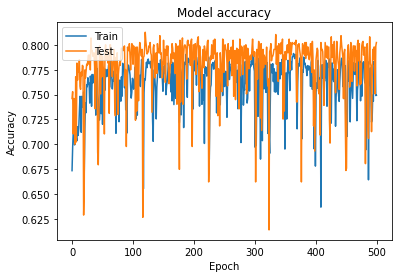

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

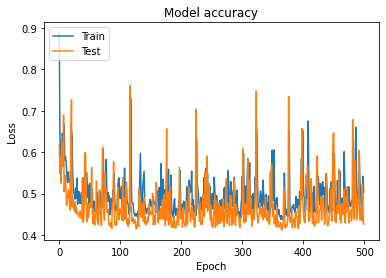

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
verite=y_test[1]


In [ ]:
model.save('/content/drive/MyDrive/Kaggle/model/')
#####charger model:
#cnn_load = keras.models.load_model("/content/saveModel")
#cnn_load = keras.models.load_model("/content/sauvegardepoids/MeilleurModel.hdf5")


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Kaggle/model/assets


In [ ]:
#prediction:
df_X = pad.read_csv('df_test_norm_full.csv')
#X=df_X.drop('Unnamed: 0',1)#enléve la premiére colone avec les numéros de ligne
X_test=df_X
y_predicted = model.predict(X_test)
predictions = np.argmax(y_predicted, axis=1)
def Boolpred(x):
  if x==0:
    vec=False
  else :
    vec=True
  return vec

y_predictions= pad.DataFrame(map(Boolpred, predictions))
y_predictions
y_predictions.to_csv("/content/ResultatpredictionTab.csv",header=False,sep=';')

In [ ]:
#performance du model

model.evaluate(X_test,y_test)

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
Lmax= max number of metter in onehotname
Npassager=matricedonne.shape[0]
Nvaraible=matricedonne.shape[1]
for i in range(Npassager):
  for j in range(Lmax):
    matricedonne[i,Nvaraible+j+1]=onehotname[i,j]
    